In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('vgsales.csv')

In [4]:
main_config = {
    "hovermode": "x unified",
    "xaxis": {"showgrid": False, "color": "white"},
    "yaxis": {"showgrid": False, "color": "white"},
    "legend": {"yanchor":"top", 
                "y":0.9, 
                "xanchor":"left",
                "x":0.1,
                "title": {"text": None},
                "font" :{"color":"white"},
                "bgcolor": "rgba(0,0,0,0.5)"},
    "margin": {"l":0, "r":0, "t":10, "b":0}
}

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.drop('Rank', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [9]:
df['Year'] = df['Year'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int32  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


In [11]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

In [13]:
pub = df.groupby('Publisher').sum()['Global_Sales'].sort_values(ascending=False).head(5)

In [14]:
plat = df.groupby('Platform').sum()['Global_Sales'].sort_values(ascending=False).head(5)

In [15]:
plat

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
Name: Global_Sales, dtype: float64

In [16]:
top_publishers = list(pub.index.values)

In [17]:
top_platforms = list(plat.index.values)

In [18]:
df_top = df[df['Publisher'].isin(top_publishers)]

In [19]:
df_top = df_top[df_top['Platform'].isin(top_platforms)]

In [20]:
df_top['Platform'].unique()

array(['Wii', 'DS', 'PS2', 'X360', 'PS3'], dtype=object)

In [21]:
df_top['Publisher'].unique()

array(['Nintendo', 'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Electronic Arts'], dtype=object)

In [22]:
df_top.groupby('Publisher')['Platform'].count()

Publisher
Activision                     563
Electronic Arts                670
Nintendo                       230
Sony Computer Entertainment    332
Ubisoft                        535
Name: Platform, dtype: int64

## GRÁFICO LINHA 2 COLUNA 1

In [23]:
df_fig1 = df.sort_values(by='Global_Sales', ascending=False).head(10)

In [24]:
df_fig1  = df_fig1[['Name', 'Global_Sales']]

In [25]:
df_fig1 = df_fig1.sort_values(by='Global_Sales', ascending=True)

In [26]:
fig1 = go.Figure(go.Bar(x=df_fig1['Global_Sales'], y=df_fig1['Name'], orientation='h'))

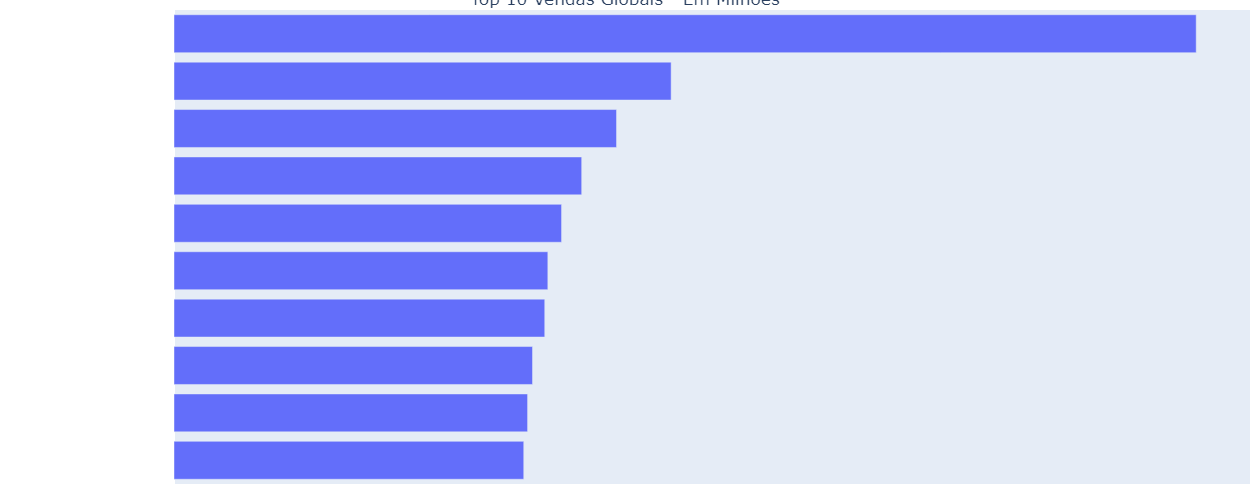

In [27]:
fig1.update_layout(main_config, height=500, title_text='Top 10 Vendas Globais - Em Milhões', title_x=0.5)

In [28]:
df_fig2 = df.sort_values(by='NA_Sales', ascending=False).head(5)

In [29]:
fig2 = go.Figure(go.Bar(x=df_fig2['NA_Sales'], y=df_fig2['Name'], orientation='h'))

In [30]:
df_fig3 = df.sort_values(by='EU_Sales', ascending=False).head(5)

In [31]:
fig3 = go.Figure(go.Bar(x=df_fig3['EU_Sales'], y=df_fig3['Name'], orientation='h'))

In [32]:
df_fig4 = df.sort_values(by='JP_Sales', ascending=False).head(5)

In [33]:
fig4 = go.Figure(go.Bar(x=df_fig4['JP_Sales'], y=df_fig4['Name'], orientation='h'))

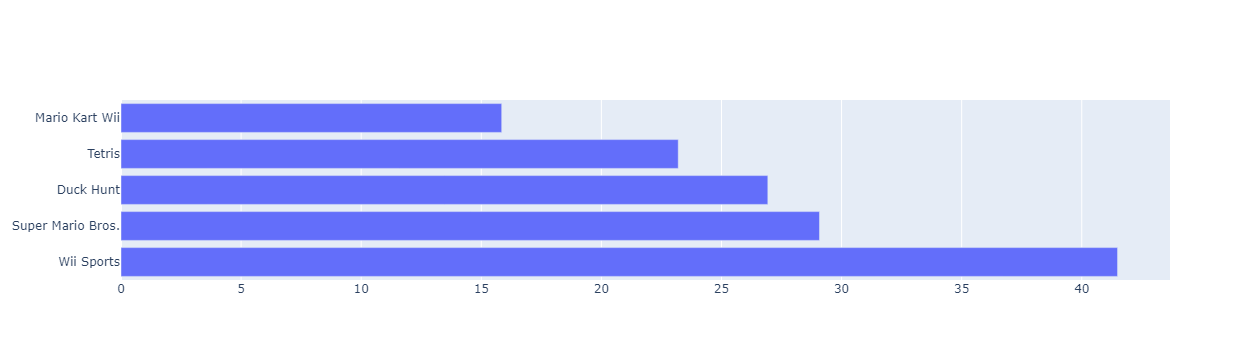

In [34]:
fig2

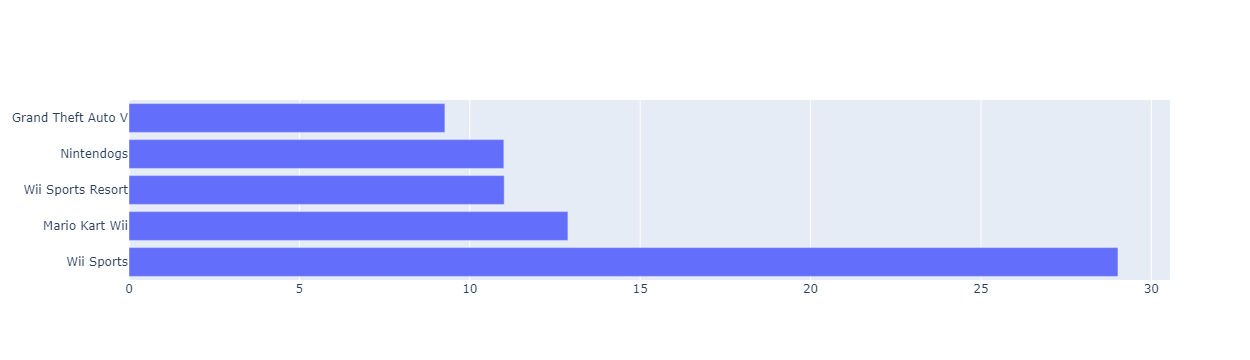

In [35]:
fig3

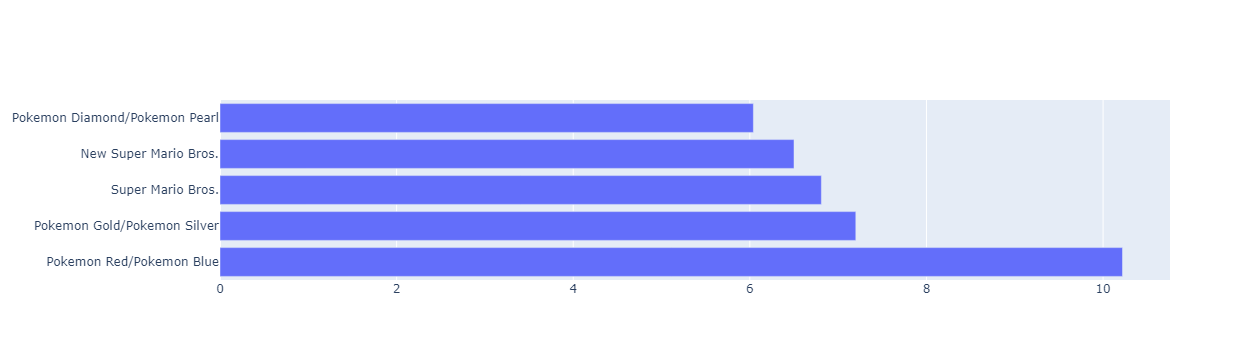

In [36]:
fig4

In [37]:
from plotly.subplots import make_subplots

In [38]:
dff1 = df.sort_values(by='NA_Sales', ascending=False).head(5)

In [39]:
dff1 = df[['Name', 'NA_Sales']]

In [40]:
dff1

,Name,NA_Sales
0,Wii Sports,41.49
1,Super Mario Bros.,29.08
2,Mario Kart Wii,15.85
3,Wii Sports Resort,15.75
4,Pokemon Red/Pokemon Blue,11.27
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.00
16596,Know How 2,0.00


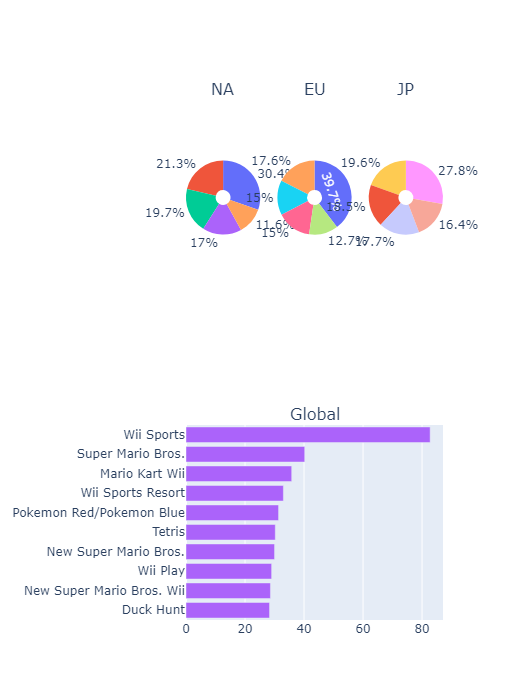

In [165]:
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],
           [{"colspan": 3}, None, None]],
    subplot_titles=("NA","EU", "JP", "Global")
)

fig.add_trace(go.Pie(values=df_fig2['NA_Sales'], labels=df_fig2['Name'], hole=.2),
              row=1, col=1)

fig.add_trace(go.Pie(values=df_fig3['EU_Sales'], labels=df_fig3['Name'], hole=.2),
              row=1, col=2)

fig.add_trace(go.Pie(values=df_fig4['JP_Sales'], labels=df_fig4['Name'], hole=.2),
              row=1, col=3)

fig.add_trace(go.Bar(x=df_fig1['Global_Sales'], y=df_fig1['Name'], orientation='h'),
              row=2, col=1)

fig.update_layout(height=700, showlegend=False)

fig.show()

## RESET - Novo Plano

In [42]:
df_platform = df.groupby('Platform')['Global_Sales'].sum()

In [43]:
df_platform.sort_values(ascending=False, inplace=True)

In [44]:
df_platform = df_platform.head(6).reset_index()

In [45]:
df_platform

,Platform,Global_Sales
0,PS2,1233.46
1,X360,969.60
2,PS3,949.35
3,Wii,909.81
4,DS,818.91
5,PS,727.39


In [46]:
fig_text = [f'{x} - R${y} milhões' for x,y in zip(df_platform['Platform'].unique(), df_platform['Global_Sales'].unique())]

### Gráfico 1

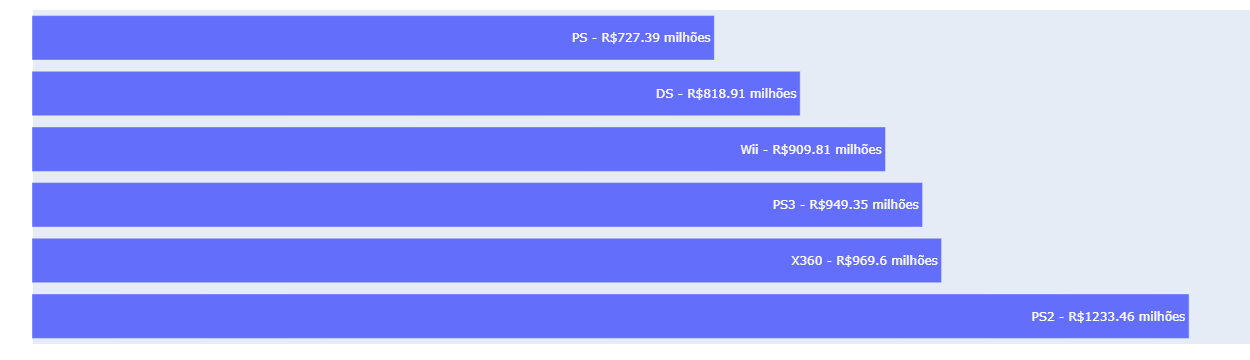

In [47]:
fig_platform = px.bar(df_platform, x='Global_Sales', y='Platform', orientation='h', text=fig_text)
fig_platform.update_layout(main_config, xaxis_title=None, yaxis_title=None)
fig_platform.show()

In [48]:
df_publisher = df.groupby('Publisher')['Global_Sales'].sum()
df_publisher.sort_values(ascending=False, inplace=True)
df_publisher = df_publisher.head(6).reset_index()

In [49]:
df_publisher

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30


### Gráfico 2

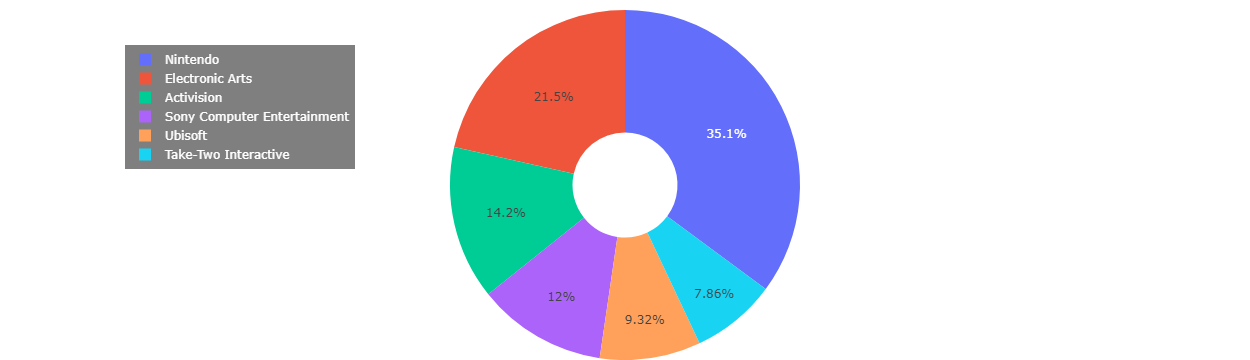

In [50]:
fig_publisher = go.Figure(go.Pie(values=df_publisher['Global_Sales'], labels=df_publisher['Publisher'], hole=.3))
fig_publisher.update_layout(main_config)
fig_publisher.show()

In [51]:
df_genre = df.groupby('Genre')['Global_Sales'].sum()
df_genre.sort_values(ascending=False, inplace=True)
df_genre = df_genre.head(10).reset_index()
df_genre

,Genre,Global_Sales
0,Action,1722.84
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.83
4,Platform,829.13
5,Misc,789.87
6,Racing,726.76
7,Fighting,444.05
8,Simulation,389.98
9,Puzzle,242.21


### Gráfico 3

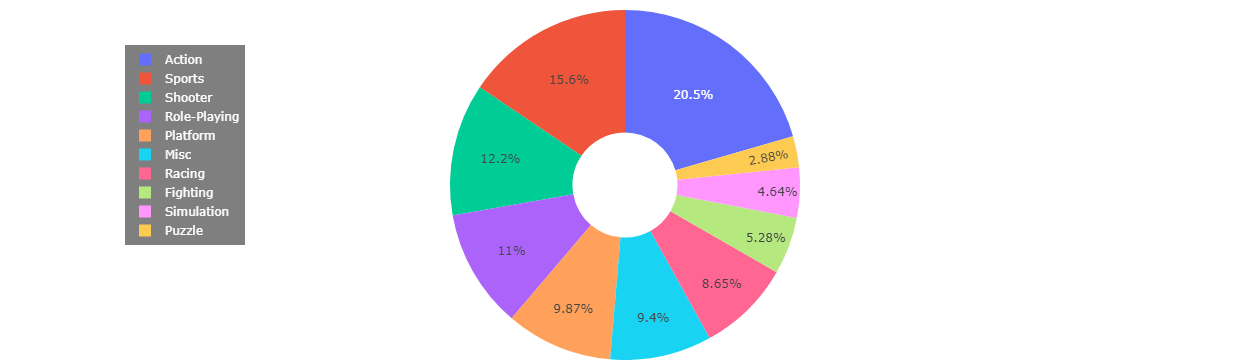

In [52]:
fig_genre = go.Figure(go.Pie(values=df_genre['Global_Sales'], labels=df_genre['Genre'], hole=.3))
fig_genre.update_layout(main_config)
fig_genre.show()

In [164]:
subplot_topgames = make_subplots(rows=1, cols=4, shared_yaxes=False, subplot_titles=("América do Norte","Europa", "Japão","Outras Regiões"))

In [54]:
# North america...

In [55]:
df_NA = df.sort_values(by='NA_Sales', ascending=False).head(6).rename(columns = {'NA_Sales': 'Sales'})
df_EU = df.sort_values(by='EU_Sales', ascending=False).head(6).rename(columns = {'EU_Sales': 'Sales'})
df_JP = df.sort_values(by='JP_Sales', ascending=False).head(6).rename(columns = {'JP_Sales': 'Sales'})
df_Other = df.sort_values(by='Other_Sales', ascending=False).head(6).rename(columns = {'Other_Sales': 'Sales'})

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int32  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


### Gráfico 4

In [57]:
fig_text = [f'{x} - R${y} milhões' for x,y in zip(df_platform['Platform'].unique(), df_platform['Global_Sales'].unique())]

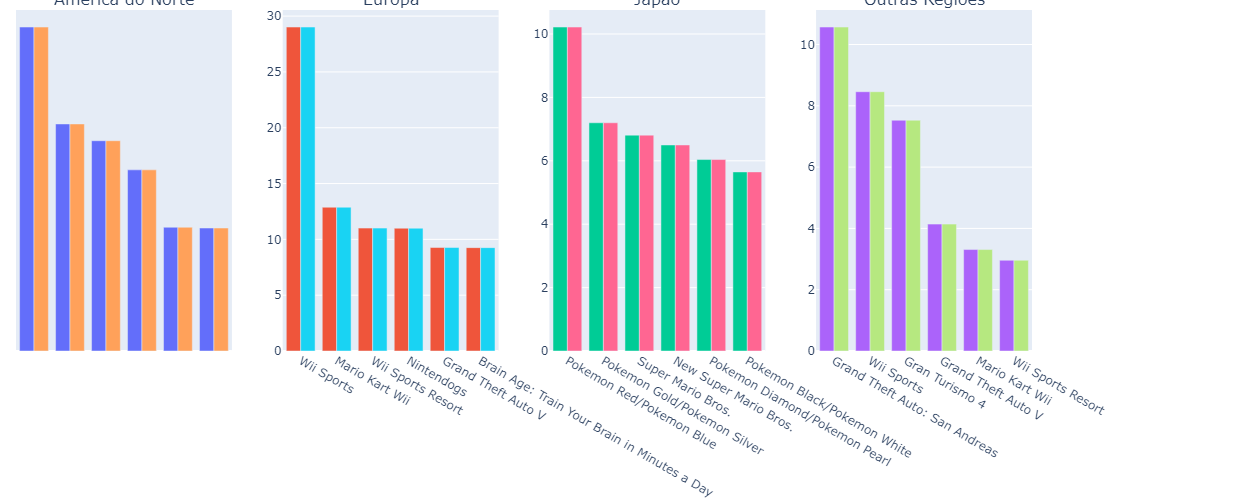

In [153]:
subplot_topgames.add_trace(go.Bar(
    x=df_NA['Name'], y=df_NA['Sales'], name='Vendas NA'),1, 1)
subplot_topgames.add_trace(go.Bar(
    x=df_EU['Name'], y=df_EU['Sales'], name='Vendas EU'),1, 2)
subplot_topgames.add_trace(go.Bar(
    x=df_JP['Name'], y=df_JP['Sales'], name='Vendas JP'),1, 3)
subplot_topgames.add_trace(go.Bar(
    x=df_Other['Name'], y=df_Other['Sales'], name='Vendas diversas'),1, 4)

subplot_topgames.update_layout(main_config, height=500)
subplot_topgames.update_layout(showlegend=False)

### Gráfico 5

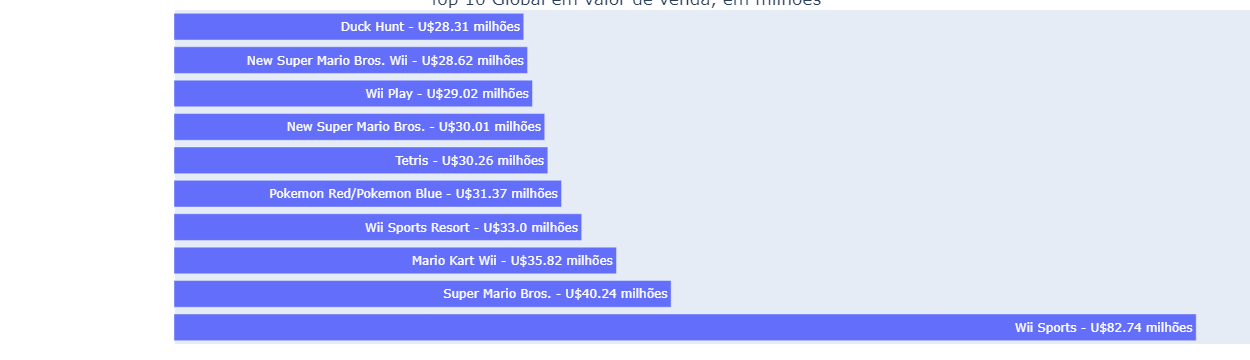

In [59]:
df_topglobal = df.sort_values(by='Global_Sales', ascending=False).head(10)
text_topglobal = [f'{x} - U${y} milhões' for x,y in zip(df_topglobal['Name'].unique(), df_topglobal['Global_Sales'].unique())]
fig_topglobal = go.Figure(go.Bar(x=df_topglobal['Global_Sales'], y=df_topglobal['Name'], orientation='h', text=text_topglobal))
fig_topglobal.update_layout(main_config, title_text= 'Top 10 Global em valor de venda, em milhões', title_x=0.5)

###### Inserir um de linha, e de alguma outra forma

In [60]:
df # só pra refrescar a memória

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [61]:
# Nesse caso vamos analisar só até 2015, pois os dados estão claramente faltantes de 2015 pra frente

In [62]:
df_anos = df.query("Year < 2016")

In [63]:
df_anos.sort_values(by=['Year', 'Global_Sales'], ascending=True).reset_index()

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,6896,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,0.24
1,6317,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
2,5366,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
3,4025,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.00,0.01,0.49
4,2669,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...,...
15940,109,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
15941,101,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
15942,92,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
15943,77,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49


In [64]:
trace2 = df_anos[['Year', 'Genre', 'Global_Sales']].reset_index()
trace2

,index,Year,Genre,Global_Sales
0,0,2006,Sports,82.74
1,1,1985,Platform,40.24
2,2,2008,Racing,35.82
3,3,2009,Sports,33.00
4,4,1996,Role-Playing,31.37
...,...,...,...,...
15940,16593,2002,Platform,0.01
15941,16594,2003,Shooter,0.01
15942,16595,2008,Racing,0.01
15943,16596,2010,Puzzle,0.01


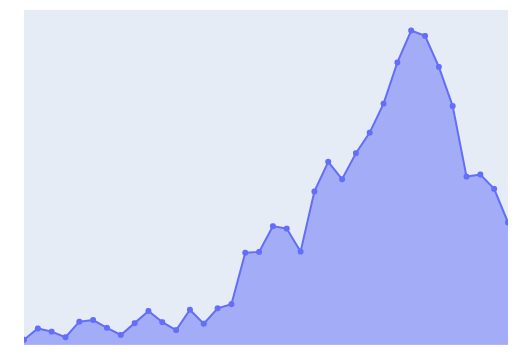

In [170]:
trace1 = df_anos.groupby('Year')['Global_Sales'].sum().reset_index()
trace2 = df_anos.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

fig_anos = go.Figure()
# fig_anos.add_bar(x=trace1['Year'], y=trace1['Global_Sales'], name='Global')
fig_anos.add_scatter(x=trace1['Year'], y=trace1['Global_Sales'], mode='lines+markers', fill='tonexty', name='Global Sales')
fig_anos.update_layout(main_config)
fig_anos

In [163]:
trace1

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


In [ ]:
out = 'Global_Sales'

name = 'Global' if 

print(name)

### Perguntas

Qual foi o jogo mais vendido por ano?
Qual foi o genero mais vendido por ano?


In [66]:
df.sort_values(by='Year').Year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020])

In [67]:
df.Publisher.nunique()

576

In [75]:
yo = df.groupby(['Publisher'])['Global_Sales'].sum()

In [79]:
yo = yo.sort_values(ascending=False).head(10)

In [80]:
yo

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.54
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.70
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

In [71]:
df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False, inplace=True).head(10)

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
yo.sort_values('Global_Sales', ascending=False)

In [ ]:
bar1 = go.Figure(go.Bar(x=trace1['Year'], y=trace1['Global_Sales'], name='Global'))

In [ ]:
bar1.show()